In [2]:
# Import the required libraries and dependencies
import pandas as pd

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import json
import dataframe_utils
%matplotlib inline

In [3]:

account_df = pd.read_csv("Resources/account_predict_data.csv")
account_df.head()


,gender,tenure,phone_services,internet_services,contract_duration,payment_method,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,...,churn,trigger_point,churn_surv,uuid,trigger_price,trigger_quality,trigger_external,cluster,treatment,churn_after_treatment
0,Female,1,1,1,short-term,mail,2,112.236770,5913.555587,19.082281,...,0,0.0,0.0,95475c60-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
1,Male,1,1,1,short-term,email,1,122.333978,3888.080228,20.798307,...,0,0.0,0.0,95475cd8-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
2,Male,1,0,1,short-term,mail,2,0.000000,2941.437280,0.000000,...,0,0.0,0.0,95475dc8-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0
3,Female,1,1,1,short-term,mail,2,115.213725,4417.942375,19.589318,...,0,0.0,0.0,95475eae-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
4,Male,1,0,1,short-term,mail,2,0.000000,2790.804987,0.000000,...,0,0.0,0.0,954761ce-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0


,tenure,churn,the_counts
0,0,0.000000,3
1,1,0.632184,174
2,2,0.603175,63
3,3,0.446429,56
4,4,0.369565,46
5,5,0.461538,39
6,6,0.200000,30
7,7,0.352941,34


,tenure,churn,the_counts
65,65,0.071429,28
66,66,0.157895,19
67,67,0.058824,17
68,68,0.040000,25
69,69,0.000000,26
70,70,0.058824,34
71,71,0.121951,41
72,72,0.018692,107


<Axes: ylabel='Frequency'>

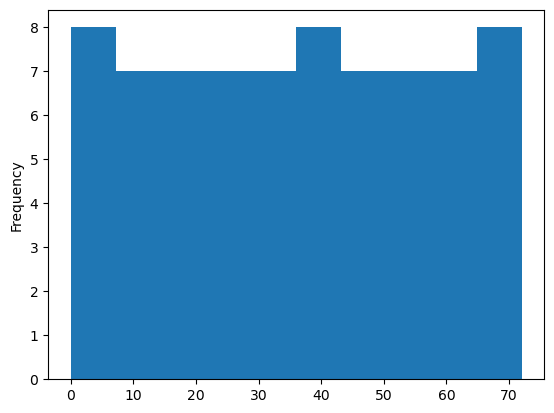

In [4]:
account_df_gender = account_df[["tenure","churn"]]
account_df_gender.head()
tenure_group = account_df_gender.groupby("tenure")
tenure_results = tenure_group.sum() / tenure_group.count() 
tenure_results["the_counts"] = tenure_group.count() 
tenure_results.reset_index(inplace=True)
display(tenure_results.head(8))
display(tenure_results.tail(8))

tenure_results["tenure"].plot.hist()

In [5]:
def closest(K,lst):
    # function returns the list element closet to K.  lst is the list to look in and K is the value to find
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
    # code above is from https://www.geeksforgeeks.org/python-find-closest-number-to-k-in-given-list/



bins = [10*x for x in range(8)]
print("The bins boundries are",bins)
print("")

# sanity check for closest function above
print(f"for 5, we have: {closest(5,bins)}")
print(f"for 5.1, we have: {closest(5.1, bins)}")
print(f"for 19, we have: {closest(19,bins)}")
print(f"for 72, we have: {closest(72,bins)}")


account_df["tenure_9_bin"] = account_df.apply(lambda x: closest(x['tenure'], bins),axis=1)
account_df[["tenure","tenure_9_bin"]].tail()
# account_df[["tenure","tenure_9_bin"]].iloc[200:]


The bins boundries are [0, 10, 20, 30, 40, 50, 60, 70]

for 5, we have: 0
for 5.1, we have: 10
for 19, we have: 20
for 72, we have: 70


,tenure,tenure_9_bin
1931,39,40
1932,39,40
1933,39,40
1934,39,40
1935,39,40


In [6]:
the_columns = account_df.columns
account_df.nunique()

columns_to_code = ['tenure','number_customer_service_calls','phone_min','internet_min','phone_monthly_charges','internet_monthly_charges','avg_monthly_bill','trigger_point','cluster']

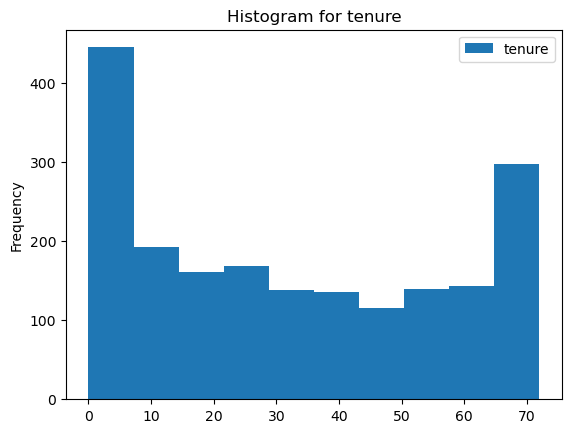

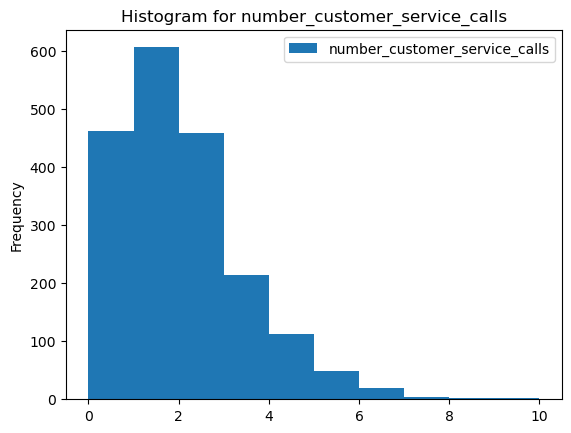

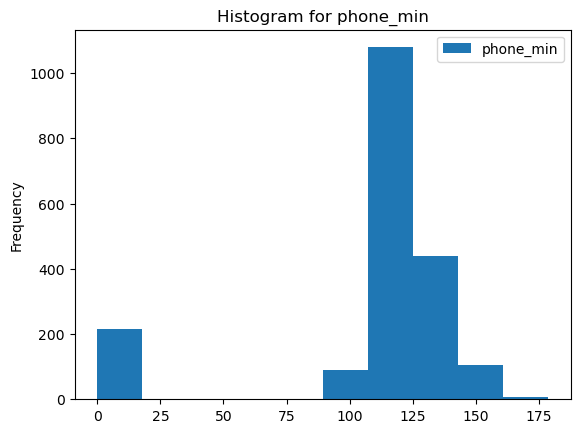

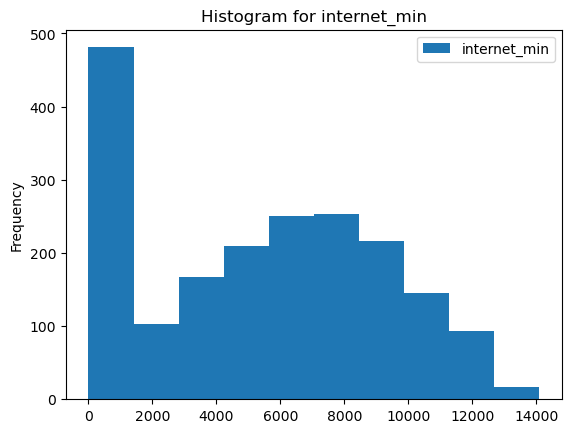

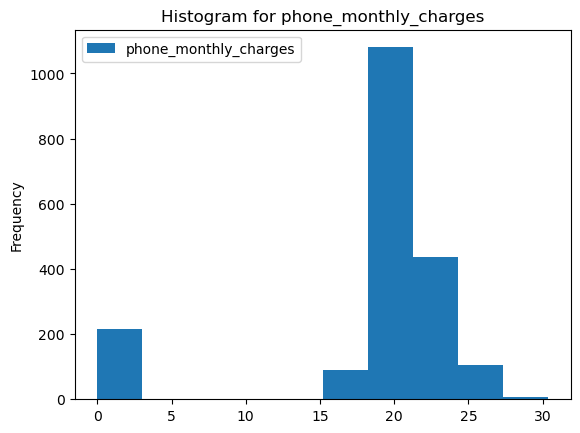

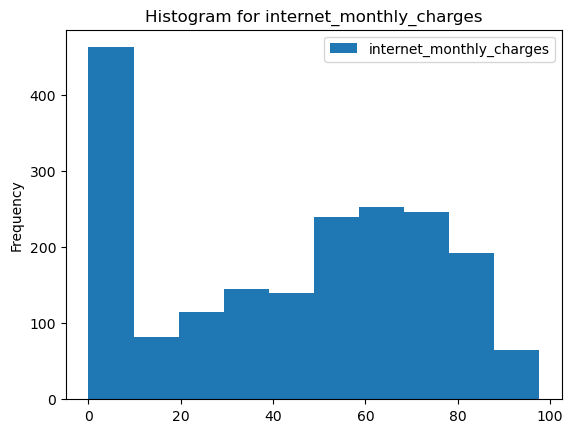

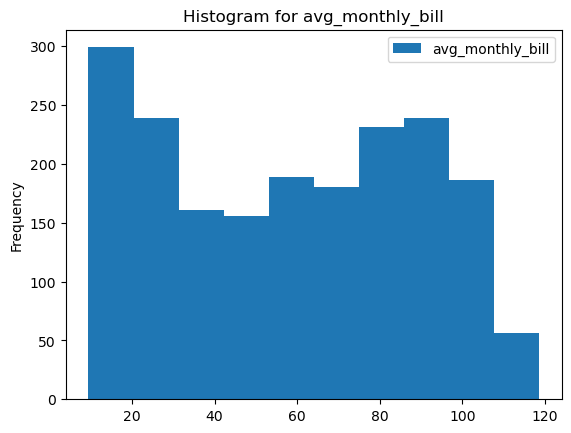

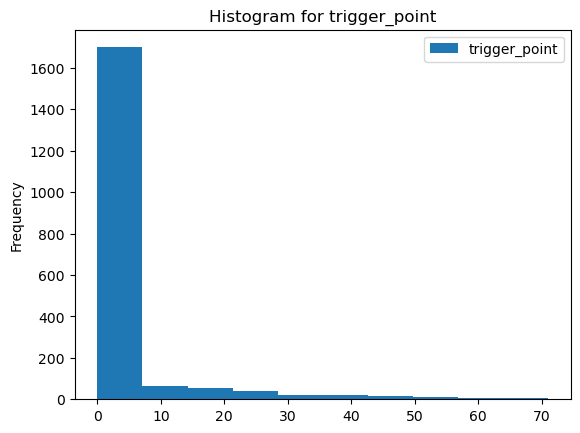

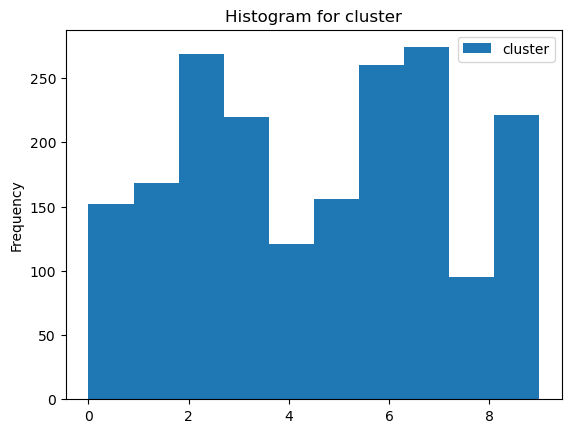

In [7]:
def hist_of_column(df,the_column):
    # routine prints out a histogram for of a column (the_column) in the data frame, df 
    df_column = df[[the_column]]
    df_column.plot.hist(title=f"Histogram for {the_column}")


# Loop over the columns to code and call the histogram creation function.
for the_column in columns_to_code:
    hist_of_column(account_df,the_column)

# zzz

In [8]:

def print_bin_defs(bin_dict_list):
    # function loops over the bin dictionary (passed in) and prints the name of the list (dict key) and the list contents (dict value is a list of the bin edge points)
    for bin_dict in bin_dict_list:
            print("")
            print("-------------------------------")
            print("column to code: ",bin_dict["column_to_code"],"    Coded column name: ",bin_dict["coded_column_name"],"  bin list name: ", bin_dict["bin_list_name"])
            print('Bin edge list: ',bin_dict["bin_value_list"])
            
            

# generate names for the binned columns. they are formated column_name_bin (so _bin just added on the end)
# columns_to_code has all of the columns that need to be 'binned'
coded_columns = [x +"_bin" for x in columns_to_code]
# print("The coded column names are...")
# print(coded_columns)

# next generate a list of the bin list names
# print("") 
# print("--------------  Now name of the actual bin lists -----------------")
bins_list_names = ["bin_list_4_" + x for x in columns_to_code]
# print("bins_list_names are...")
# print(bins_list_names)


# 'bin_list_4_tenure', 'bin_list_4_number_customer_service_calls', 'bin_list_4_phone_min', 'bin_list_4_internet_min', 'bin_list_4_phone_monthly_charges', 
# # 'bin_list_4_internet_monthly_charges', 'bin_list_4_avg_monthly_bill', 'bin_list_4_trigger_point', 'bin_list_4_cluster']
bin_list_4_tenure = [10*x for x in range(8)]
bin_list_4_number_customer_service_calls = [x for x in range(9)]
bin_list_4_phone_min = [0,15,95,115,135,155]
bin_list_4_internet_min = [2000 * x for x in range(7)]
bin_list_4_phone_monthly_charges = [5*x for x in range(7)]
bin_list_4_internet_monthly_charges = [10 * x for x in range(11)]

bin_list_4_avg_monthly_bill = [25*x for x in range(6)]
bin_list_4_avg_monthly_bill.insert(1,10)

bin_list_4_trigger_point = [0,5,10,20,30,40,50,60]
bin_list_4_cluster = [x for x in range(9)]


bin_lists = [bin_list_4_tenure, bin_list_4_number_customer_service_calls, bin_list_4_phone_min, bin_list_4_internet_min, bin_list_4_phone_monthly_charges, \
    bin_list_4_internet_monthly_charges, bin_list_4_avg_monthly_bill, bin_list_4_trigger_point, bin_list_4_cluster]


# set up the bin dictionaries. the keys are the bin names and the values are the bin edge point lists
# old: bin_dict_list  = [{bins_list_names[x]:bin_lists[x] for x in range(len(bins_list_names))}]
bin_dict_list  = [{"column_to_code":columns_to_code[x],"coded_column_name":coded_columns[x],"bin_list_name":bins_list_names[x],"bin_value_list":bin_lists[x]} for x in range(len(bins_list_names))]
print("")
print("---------------- loop through list of dictionaries and print out the bin list names and their list contents. List contents are the bin edges")

print_bin_defs(bin_dict_list)


---------------- loop through list of dictionaries and print out the bin list names and their list contents. List contents are the bin edges

-------------------------------
column to code:  tenure     Coded column name:  tenure_bin   bin list name:  bin_list_4_tenure
Bin edge list:  [0, 10, 20, 30, 40, 50, 60, 70]

-------------------------------
column to code:  number_customer_service_calls     Coded column name:  number_customer_service_calls_bin   bin list name:  bin_list_4_number_customer_service_calls
Bin edge list:  [0, 1, 2, 3, 4, 5, 6, 7, 8]

-------------------------------
column to code:  phone_min     Coded column name:  phone_min_bin   bin list name:  bin_list_4_phone_min
Bin edge list:  [0, 15, 95, 115, 135, 155]

-------------------------------
column to code:  internet_min     Coded column name:  internet_min_bin   bin list name:  bin_list_4_internet_min
Bin edge list:  [0, 2000, 4000, 6000, 8000, 10000, 12000]

-------------------------------
column to code:  phone_m

In [9]:
# account_df["tenure_9_bin"] = account_df.apply(lambda x: closest(x[coded_columns], bins),axis=1)

print("column to code: ",bin_dict_list[1]["column_to_code"])
print("coded column name will be: ",bin_dict_list[1]["coded_column_name"])
print("bin_list_name: ",bin_dict_list[1]["bin_list_name"])
print("bin values: ",bin_dict_list[1]["bin_value_list"])

# account_df[bin_dict_list[1]["coded_column_name"]] = account_df.apply(lambda x: closest(x[bin_dict_list[1]["column_to_code"]], bin_dict_list[1]["bin_value_list"]),axis=1)

for this_bin_dict in bin_dict_list:
    account_df[this_bin_dict["coded_column_name"]] = account_df.apply(lambda x: closest(x[this_bin_dict["column_to_code"]], this_bin_dict["bin_value_list"]),axis=1)

account_df.head()

column to code:  number_customer_service_calls
coded column name will be:  number_customer_service_calls_bin
bin_list_name:  bin_list_4_number_customer_service_calls
bin values:  [0, 1, 2, 3, 4, 5, 6, 7, 8]


,gender,tenure,phone_services,internet_services,contract_duration,payment_method,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,...,tenure_9_bin,tenure_bin,number_customer_service_calls_bin,phone_min_bin,internet_min_bin,phone_monthly_charges_bin,internet_monthly_charges_bin,avg_monthly_bill_bin,trigger_point_bin,cluster_bin
0,Female,1,1,1,short-term,mail,2,112.236770,5913.555587,19.082281,...,0,0,2,115,6000,20,40,25,0,6
1,Male,1,1,1,short-term,email,1,122.333978,3888.080228,20.798307,...,0,0,1,115,4000,20,20,10,0,6
2,Male,1,0,1,short-term,mail,2,0.000000,2941.437280,0.000000,...,0,0,2,0,2000,0,20,25,0,4
3,Female,1,1,1,short-term,mail,2,115.213725,4417.942375,19.589318,...,0,0,2,115,4000,20,30,25,0,6
4,Male,1,0,1,short-term,mail,2,0.000000,2790.804987,0.000000,...,0,0,2,0,2000,0,30,25,0,4


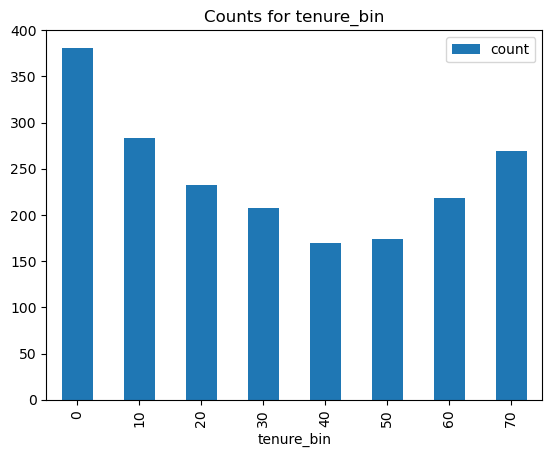

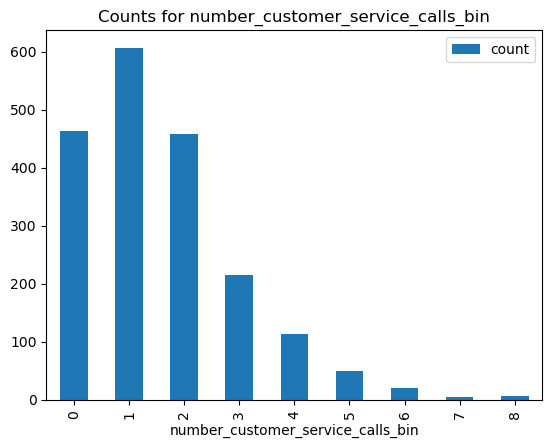

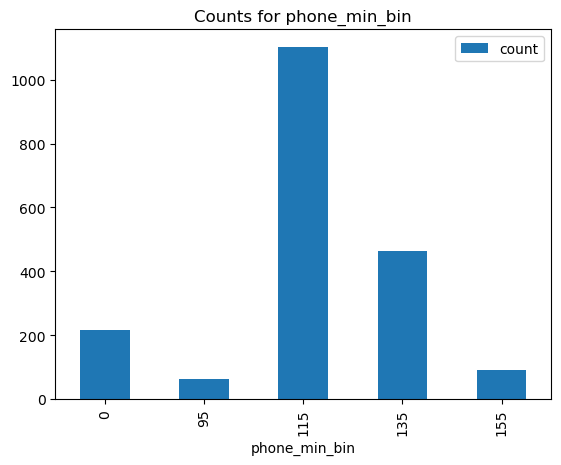

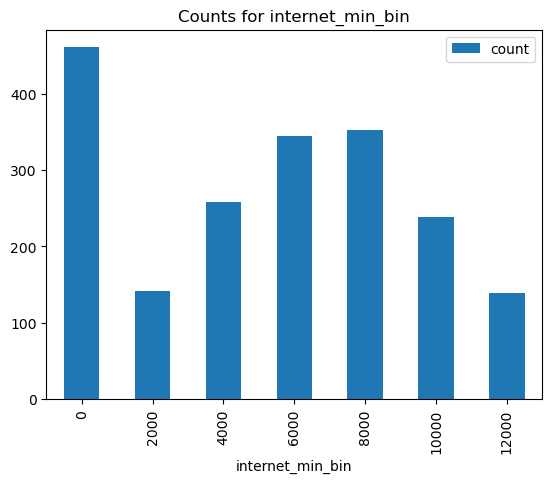

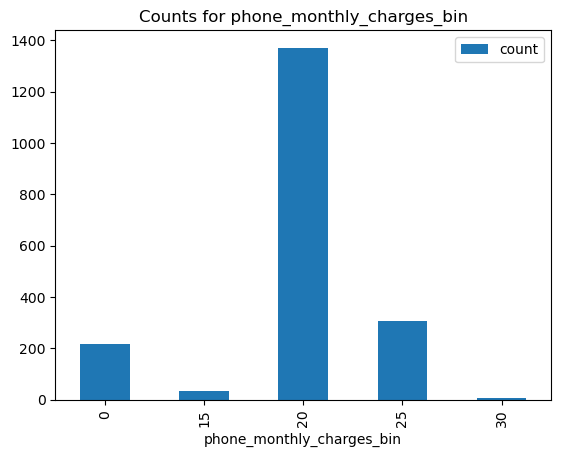

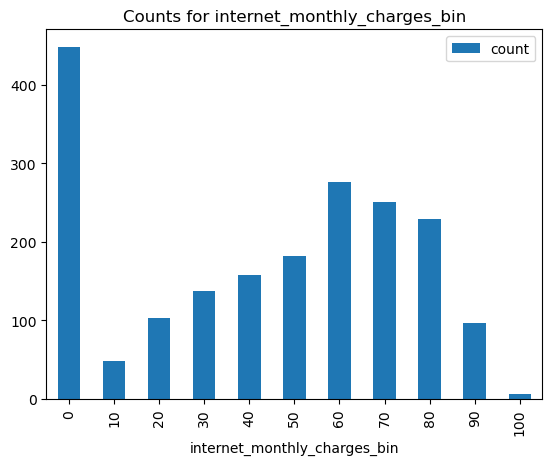

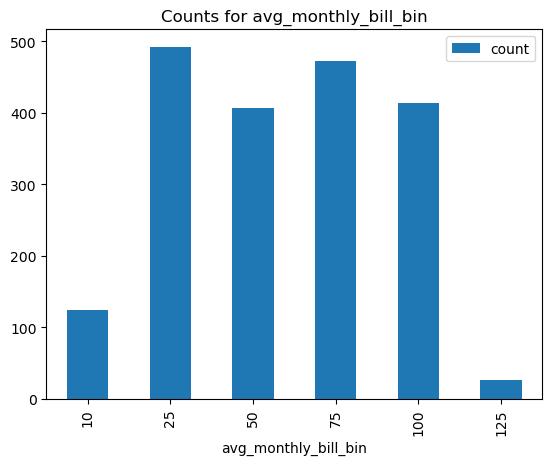

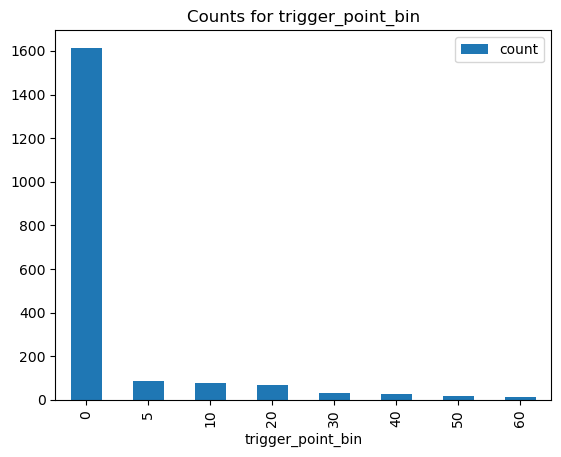

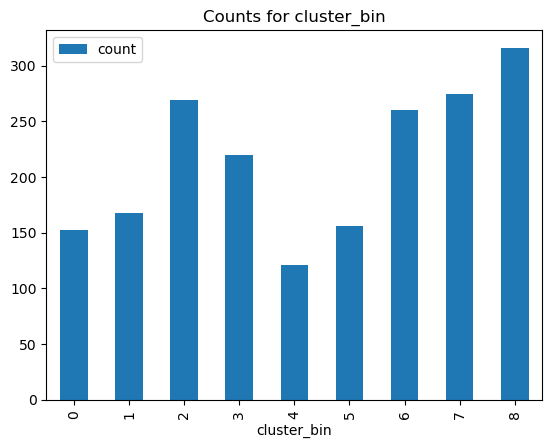

In [10]:
# account_df[[bin_dict_list[2]["coded_column_name"]]].hvplot.hist(title = 'Try 1')

# bar_graph_df = account_df[[bin_dict_list[2]["coded_column_name"]]]
# display(bar_graph_df)
# print("")
# print("just the column name: ",bin_dict_list[2]["coded_column_name"])
# # bar_graph_df["the_counts"] = bar_graph_df.groupby(bin_dict_list[2]["coded_column_name"]).count()
# small_df = bar_graph_df.groupby(bin_dict_list[2]["coded_column_name"]).value_counts().to_frame()
# # small_df.hvplot.bar(y="count")
# small_df.plot()

def plot_binned_data():
    for bin_dict in bin_dict_list:
        # print("for ",bin_dict["coded_column_name"])
        temp_df = account_df[[bin_dict["coded_column_name"]]]
        temp_df_agg = temp_df.groupby(bin_dict["coded_column_name"]).value_counts().to_frame()
        # display(temp_df_agg.head())
        # temp_df_agg.hvplot.bar(y="count",title = "Counts for " + bin_dict["coded_column_name"])
        temp_df_agg.plot.bar(y="count",title = "Counts for " + bin_dict["coded_column_name"])
        
    return True

result = plot_binned_data()


# zzz

In [18]:
def return_columns_to_exclude():
    return columns_to_code

account_df.to_csv("output/account_df.csv")
columns_to_exclude_df = pd.DataFrame({"Col_to_Exclude":columns_to_code})
# columns_to_exclude_df
columns_to_exclude_df.to_csv("output/columns_to_exclude.csv")


Cody's function:

Inputs:  
1) updated data frame including the new coded columns 
2) list of coded columns



Outputs:
1) data frames of the aggregations. Includes the coded column and the summary churn % for that column.
2) separate function to use these dataframes and return the plots.

['tenure',
 'number_customer_service_calls',
 'phone_min',
 'internet_min',
 'phone_monthly_charges',
 'internet_monthly_charges',
 'avg_monthly_bill',
 'trigger_point',
 'cluster']